In [30]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [31]:
X, y = make_classification(
    n_samples=1000,
    n_informative=4, n_redundant=5, n_features=20, n_clusters_per_class=3,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

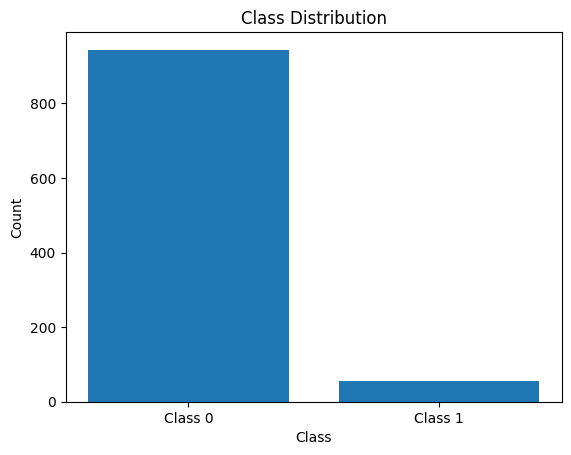

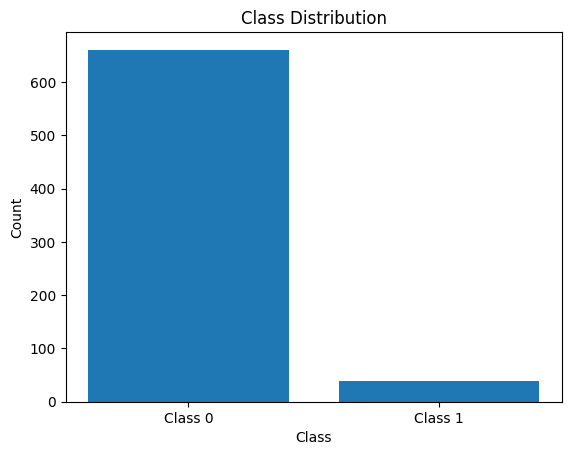

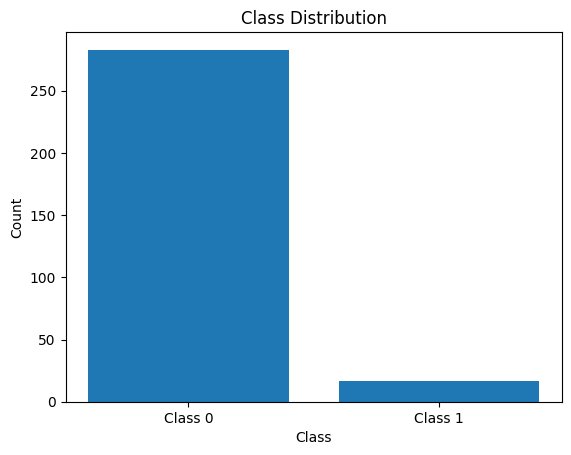

In [32]:
def visualize_class_distribution(y):
    plt.bar(['Class 0', 'Class 1'], [sum(y == 0), sum(y == 1)])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

visualize_class_distribution(y)
visualize_class_distribution(y_train)
visualize_class_distribution(y_test)

In [33]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(f"F1 Score:", f1_score(y_test, y_pred))
print(f"AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

Confusion Matrix:
 [[213  70]
 [  8   9]]
Accuracy: 0.74
Precision: 0.11392405063291139
Recall: 0.5294117647058824
F1 Score: 0.1875
AUC Score: 0.6817709415921847


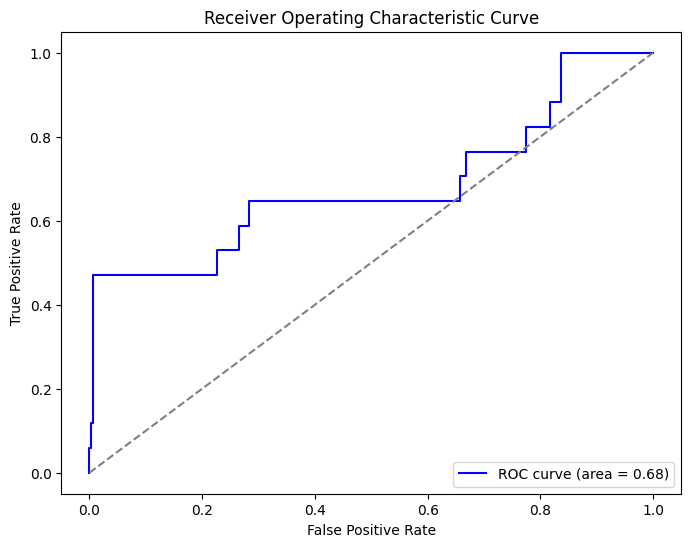

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()